In [1]:
# a) Find Missing Values and replace the missing values with suitable alternative.
# b) Remove inconsistency (if any) in the dataset.
# c) Prepare boxplot analysis for each numerical attribute. Find outliers (if any) in each attribute in the dataset.
# d) Draw histogram for any two suitable attributes (E.g. age and Chol attributes for above dataset)
# e) Find data type of each column.
# f) Finding out Zero's.
# g) Find Mean age of patients considering above dataset.
# h) Find shape of data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df.shape

(303, 15)

In [5]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicates hence no Inconsistencies. To remove Inconsistencies we use df.drop_duplicates()

The heatmap function takes the input as the dataframe created by df.isnull()

<Axes: >

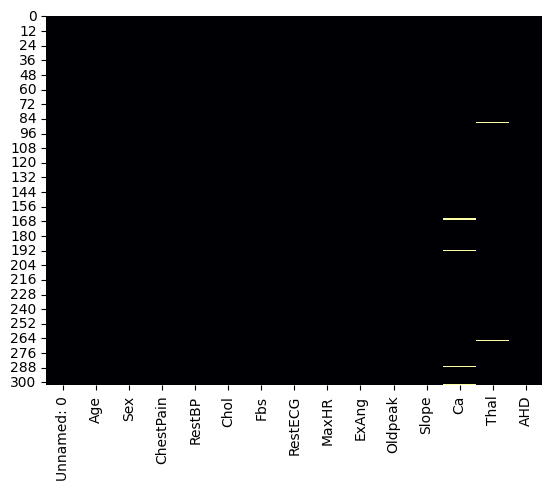

In [7]:
sns.heatmap(df.isnull(), cbar=False, cmap='inferno')

In [8]:
df['Ca'].fillna(df['Ca'].mean())

0      0.000000
1      3.000000
2      2.000000
3      0.000000
4      0.000000
         ...   
298    0.000000
299    2.000000
300    1.000000
301    1.000000
302    0.672241
Name: Ca, Length: 303, dtype: float64

In [9]:
df['Thal'].fillna(df['Thal'].mode()[0])

0           fixed
1          normal
2      reversable
3          normal
4          normal
          ...    
298    reversable
299    reversable
300    reversable
301        normal
302        normal
Name: Thal, Length: 303, dtype: object

In [10]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

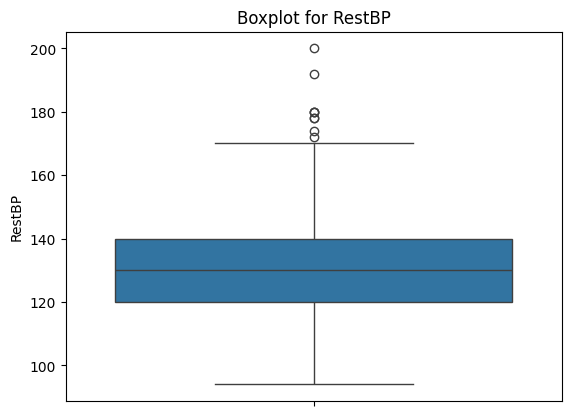

In [11]:
plt.figure()
sns.boxplot(y=df['RestBP'])
plt.title("Boxplot for RestBP")
plt.show()

In [12]:
Q1 = df['RestBP'].quantile(0.25)
Q3 = df['RestBP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[(df['RestBP'] < lower_bound) | (df['RestBP'] > upper_bound)]
outliers

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
14,15,52,1,nonanginal,172,199,1,0,162,0,0.5,1,0.0,reversable,No
83,84,68,1,nonanginal,180,274,1,2,150,1,1.6,2,0.0,reversable,Yes
126,127,56,0,asymptomatic,200,288,1,2,133,1,4.0,3,2.0,reversable,Yes
172,173,59,0,asymptomatic,174,249,0,0,143,1,0.0,2,0.0,normal,Yes
183,184,59,1,typical,178,270,0,2,145,0,4.2,3,0.0,reversable,No
188,189,54,1,nontypical,192,283,0,2,195,0,0.0,1,1.0,reversable,Yes
201,202,64,0,asymptomatic,180,325,0,0,154,1,0.0,1,0.0,normal,No
213,214,66,0,asymptomatic,178,228,1,0,165,1,1.0,2,2.0,reversable,Yes
231,232,55,0,asymptomatic,180,327,0,1,117,1,3.4,2,0.0,normal,Yes


Text(0.5, 1.0, 'Distribution of Age')

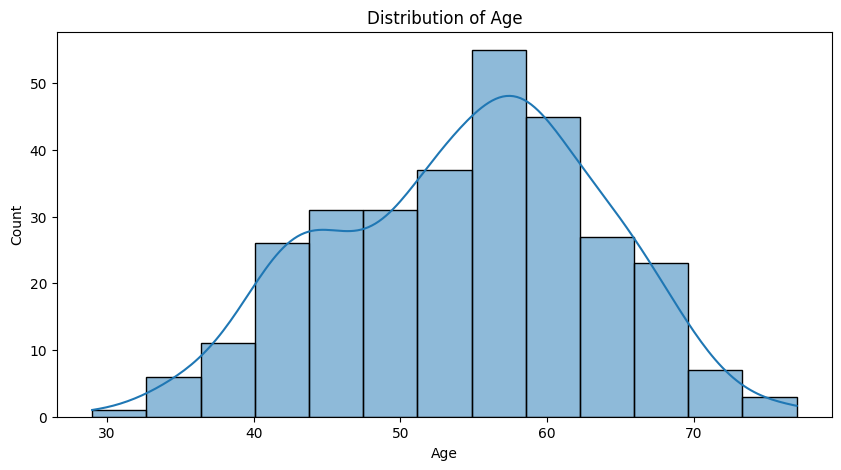

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Chol')

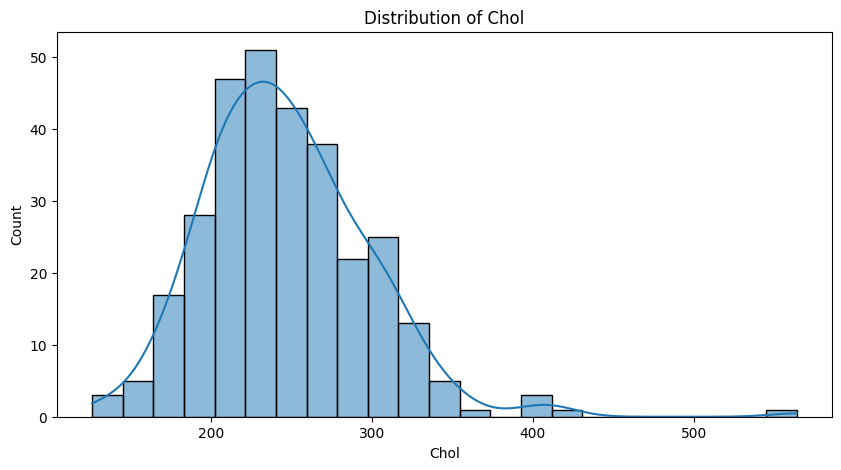

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Chol'], kde=True)
plt.title('Distribution of Chol')

<Axes: xlabel='RestBP', ylabel='Count'>

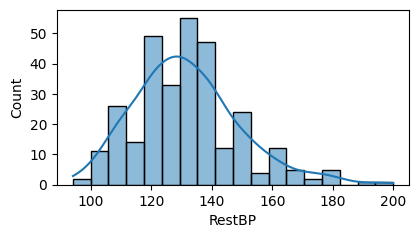

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,2)
sns.histplot(df['RestBP'], kde=True)

In [16]:
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [17]:
(df['RestECG'] == 0).sum()

np.int64(151)

In [18]:
df['Age'].mean()

np.float64(54.43894389438944)

In [19]:
df.shape

(303, 15)